# Import Required Libraries

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

#for feature selection
import statsmodels.api as sm

# for model fitting
from sklearn.ensemble import RandomForestClassifier #ensemble model
from sklearn.linear_model import LogisticRegression
from sklearn.neighbors import KNeighborsClassifier


from sklearn.decomposition import PCA
 
from sklearn.model_selection import KFold,StratifiedKFold
from sklearn.model_selection import cross_validate
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import  cross_val_predict
from sklearn import metrics

from sklearn.metrics import confusion_matrix, classification_report #evaluation 

from sklearn.preprocessing import StandardScaler, LabelEncoder #preprocessing
from sklearn.model_selection import train_test_split #training and testing

from sklearn.metrics import accuracy_score

from prettytable import PrettyTable

import warnings
warnings.filterwarnings("ignore")

# Data Preparation

In [2]:
# loading the datasets
# dataset names list
dataset_names = ["data1", "data2", "data3", "data4", "data5", "data6", "data7", "data8", "data9", "data10", "data11", "data12", "data13", "data14", "data15"]
 
# create empty list
dataframes_list = []
 
# append datasets into the list
for i in range(15):
    data_df = pd.read_csv("./datasets/"+dataset_names[i]+".csv")
    dataframes_list.append(data_df)

In [3]:
# displaying the datasets
for dataset in dataframes_list:
    display(dataset)

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,NoEvents
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,NoEvents
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,NoEvents
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,NoEvents
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4961,28.229631,130882.4694,-91.730543,130882.4694,148.264289,130957.6892,25.553918,459.42299,-95.683952,466.93050,...,0,0,0,0,0,0,0,0,0,Natural
4962,28.195253,130957.6892,-91.770650,130932.6159,148.224182,131032.9090,25.267439,460.70476,-95.752707,467.66294,...,0,0,0,0,0,0,0,0,0,Natural
4963,28.000447,131057.9823,-91.971185,131057.9823,148.035105,131133.2021,24.316329,464.36696,-96.251180,468.94471,...,0,0,0,0,0,0,0,0,0,Natural
4964,27.971800,131083.0556,-91.994104,131057.9823,148.006458,131133.2021,24.259033,464.18385,-96.314205,469.12782,...,0,0,0,0,0,0,0,0,0,Natural


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,-26.247197,130681.8832,-146.224559,130656.8100,93.781732,130757.1031,-24.287681,390.75674,-148.688277,414.92726,...,0,0,0,0,0,0,0,0,0,NoEvents
1,-28.441625,130255.6377,-148.413258,130230.5644,91.581574,130330.8575,-29.375546,458.69055,-152.498447,477.73399,...,0,0,0,0,0,0,0,0,0,NoEvents
2,-28.968746,130431.1505,-148.951838,130431.1505,91.054453,130506.3704,-29.971422,458.87366,-153.048486,477.36777,...,0,0,0,0,0,0,0,0,0,NoEvents
3,-29.163552,130456.2238,-149.146644,130406.0773,90.848188,130506.3704,-30.263631,459.42299,-153.214644,477.18466,...,0,0,0,0,0,0,0,0,0,NoEvents
4,-29.461490,130406.0773,-149.438852,130381.0040,90.561709,130456.2238,-30.825129,461.07098,-153.638633,478.28332,...,0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5064,143.428525,130381.0040,23.445433,130330.8575,-96.543388,130456.2238,141.360147,486.15705,19.738396,494.76322,...,0,0,0,0,0,0,0,0,0,Natural
5065,143.411336,130506.3704,23.433974,130481.2971,-96.554848,130581.5902,140.884592,489.08681,19.406081,496.77743,...,0,0,0,0,0,0,0,0,0,Natural
5066,143.227990,130782.1763,23.256357,130757.1031,-96.749653,130857.3961,139.435009,496.41121,18.603940,500.43963,...,0,0,0,0,0,0,0,0,0,Natural
5067,143.147775,130782.1763,23.170413,130782.1763,-96.824138,130882.4694,139.119882,497.87609,18.351838,501.35518,...,0,0,0,0,0,0,0,0,0,Natural


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,64.480670,130431.1505,-55.513881,130381.0040,-175.514161,130481.2971,64.411915,481.39619,-60.596016,509.22891,...,0,0,0,0,0,0,0,0,0,NoEvents
1,71.000930,131383.9348,-48.987891,131333.7883,-168.982442,131459.1546,77.933719,264.04462,-48.013863,282.90495,...,0,0,0,0,0,0,0,0,0,NoEvents
2,74.879854,132361.7923,-45.108967,132311.6458,-165.114977,132411.9389,78.426463,274.48189,-44.329745,281.62318,...,0,0,0,0,0,0,0,0,0,NoEvents
3,74.702237,132261.4993,-45.269395,132211.3527,-165.281135,132311.6458,77.435246,277.41165,-44.581846,281.98940,...,0,0,0,0,0,0,0,0,0,NoEvents
4,74.633482,132236.4260,-45.361069,132186.2794,-165.361349,132311.6458,77.034176,278.51031,-44.696438,282.17251,...,0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5410,132.702755,131308.7150,12.725393,131283.6417,-107.274888,131383.9348,137.051505,322.09049,17.194463,322.45671,...,0,0,0,0,0,0,0,0,0,Natural
5411,131.980828,131835.2537,11.992007,131835.2537,-107.979626,131935.5467,132.061042,337.47173,11.946170,338.38728,...,0,0,0,0,0,0,0,0,0,Natural
5412,131.780293,131885.4002,11.802931,131860.3269,-108.191620,131960.6200,131.379222,338.75350,11.258621,339.85216,...,0,0,0,0,0,0,0,0,0,Natural
5413,131.757375,131885.4002,11.762824,131860.3269,-108.214539,131985.6933,131.270360,339.11972,11.241432,340.03527,...,0,0,0,0,0,0,0,0,0,Natural


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,-1.483961,129729.0990,-121.467053,129704.0257,118.527779,129779.2455,-1.885031,464.55007,-125.615267,486.88949,...,0,0,0,0,0,0,0,0,0,NoEvents
1,-3.093972,130155.3446,-123.077064,130130.2713,116.917768,130230.5644,-5.569150,496.77743,-127.849802,509.59513,...,0,0,0,0,0,0,0,0,0,NoEvents
2,-3.185645,130305.7842,-123.151549,130255.6377,116.843283,130355.9307,-5.832710,497.32676,-127.924287,509.22891,...,0,0,0,0,0,0,0,0,0,NoEvents
3,-3.283048,130581.5902,-123.271870,130531.4436,116.734421,130631.7367,-6.428586,499.15786,-128.090445,508.49647,...,0,0,0,0,0,0,0,0,0,NoEvents
4,-3.374721,130706.9565,-123.363543,130656.8100,116.631289,130757.1031,-6.927060,501.17207,-128.250873,508.67958,...,0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5197,118.522049,131634.6675,-1.449583,131584.5210,-121.449864,131684.8140,124.836044,290.41246,4.967544,289.49691,...,0,0,0,0,0,0,0,0,0,Natural
5198,118.424647,131659.7408,-1.552716,131609.5942,-121.547267,131709.8873,124.205791,291.87734,4.314372,290.59557,...,0,0,0,0,0,0,0,0,0,Natural
5199,118.086602,131910.4735,-1.867842,131860.3269,-121.885312,131960.6200,121.260788,299.93418,1.426665,298.83552,...,0,0,0,0,0,0,0,0,0,Natural
5200,117.725638,132085.9864,-2.240265,132035.8398,-122.246275,132136.1329,118.556427,307.25858,-1.174563,306.15992,...,0,0,0,0,0,0,0,0,0,Natural


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,66.445915,133715.7489,-53.537176,133715.7489,-173.531727,133790.9687,63.896253,589.79731,-60.464236,622.57400,...,0,0,0,0,0,0,0,0,0,NoEvents
1,59.908467,127622.9443,-60.068895,127597.8710,179.943125,127673.0908,55.089892,629.34907,-67.964254,654.06892,...,0,0,0,0,0,0,0,0,0,NoEvents
2,58.630771,127296.9918,-61.346591,127271.9185,178.659700,127372.2116,52.987137,638.68768,-69.494051,658.09734,...,0,0,0,0,0,0,0,0,0,NoEvents
3,62.996710,131534.3744,-56.980653,131509.3012,-176.969474,131609.5942,62.068518,448.25328,-61.237729,466.38117,...,0,0,0,0,0,0,0,0,0,NoEvents
4,64.314513,131333.7883,-55.680039,131308.7150,-175.668860,131434.0813,62.979521,451.54926,-59.616259,466.38117,...,0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5156,-56.212889,131985.6933,-176.184522,131935.5467,63.810310,132060.9131,-52.030297,280.89074,-174.402623,288.21514,...,0,0,0,0,0,0,0,0,0,Natural
5157,-56.293103,132060.9131,-176.270466,132010.7666,63.735825,132136.1329,-52.906923,284.00361,-174.866719,289.13069,...,0,0,0,0,0,0,0,0,0,Natural
5158,-56.316022,132060.9131,-176.293384,132035.8398,63.707177,132136.1329,-53.067351,284.00361,-175.101632,289.86313,...,0,0,0,0,0,0,0,0,0,Natural
5159,-56.522286,132161.2062,-176.499649,132111.0596,63.500912,132236.4260,-54.585689,287.84892,-175.920961,291.69423,...,0,0,0,0,0,0,0,0,0,Natural


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,-139.612626,131885.4002,100.410854,131835.2537,-19.572238,131960.6200,-137.767702,430.49161,96.153777,462.71897,...,0,0,0,0,0,0,0,0,0,NoEvents
1,-140.174125,131383.9348,99.855085,131358.8615,-20.133737,131459.1546,-138.655786,433.23826,95.506335,464.18385,...,0,0,0,0,0,0,0,0,0,NoEvents
2,-140.603843,131057.9823,99.419637,131007.8358,-20.574914,131133.2021,-139.194367,435.06936,95.185479,465.28251,...,0,0,0,0,0,0,0,0,0,NoEvents
3,-140.684057,130982.7625,99.322234,130932.6159,-20.660858,131057.9823,-139.383443,436.16802,95.145371,465.64873,...,0,0,0,0,0,0,0,0,0,NoEvents
4,-141.990401,130130.2713,98.033079,130105.1980,-21.961472,130205.4911,-141.320040,442.21065,94.131236,466.74739,...,0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
4962,173.864043,131233.4952,53.869492,131183.3486,-66.136518,131283.6417,179.948855,325.93580,57.398912,334.72508,...,0,0,0,0,0,0,0,0,0,Natural
4963,173.852584,131233.4952,53.863762,131183.3486,-66.147977,131283.6417,179.903018,326.11891,57.358805,334.72508,...,0,0,0,0,0,0,0,0,0,Natural
4964,173.382758,131283.6417,53.405396,131233.4952,-66.606344,131333.7883,177.359085,333.62642,55.147188,341.31704,...,0,0,0,0,0,0,0,0,0,Natural
4965,173.348381,131308.7150,53.376748,131258.5685,-66.634992,131358.8615,177.026770,334.72508,54.975300,341.50015,...,0,0,0,0,0,0,0,0,0,Natural


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,102.421936,135571.1709,-17.555427,135571.1709,-137.544248,135671.4640,100.599930,571.48631,-23.955365,603.71367,...,0,0,0,0,0,0,0,0,0,NoEvents
1,93.036887,128024.1166,-26.940476,127999.0434,-146.929297,128099.3364,88.819917,612.31984,-34.555085,638.87079,...,0,0,0,0,0,0,0,0,0,NoEvents
2,99.539958,131709.8873,-20.431675,131709.8873,-140.437685,131810.1804,100.393665,391.30607,-22.952689,407.78597,...,0,0,0,0,0,0,0,0,0,NoEvents
3,100.112915,132085.9864,-19.852988,132060.9131,-139.858998,132161.2062,100.874949,390.39052,-22.259410,406.87042,...,0,0,0,0,0,0,0,0,0,NoEvents
4,100.645766,131985.6933,-19.331596,131960.6200,-139.326147,132060.9131,100.387935,395.70071,-21.904177,407.41975,...,0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5231,-15.561534,131007.8358,-135.533166,131007.8358,104.467395,131083.0556,-18.626858,462.53586,-139.177178,467.29672,...,0,0,0,0,0,0,0,0,0,Natural
5232,-15.572993,131032.9090,-135.550355,131007.8358,104.455936,131108.1288,-18.729990,462.53586,-139.251663,467.29672,...,0,0,0,0,0,0,0,0,0,Natural
5233,-15.658937,131057.9823,-135.636299,131032.9090,104.369992,131133.2021,-19.136790,464.55007,-139.532412,468.39538,...,0,0,0,0,0,0,0,0,0,Natural
5234,-15.733421,131057.9823,-135.710783,131032.9090,104.289778,131133.2021,-19.406081,465.46562,-139.773054,468.94471,...,0,0,0,0,0,0,0,0,0,Natural


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,-115.090032,130431.1505,124.933447,130381.0040,4.927437,130506.3704,-115.829148,459.05677,120.756585,475.53667,...,0,0,0,0,0,0,0,0,0,NoEvents
1,-116.396376,130706.9565,123.627104,130656.8100,3.615364,130782.1763,-118.613723,466.93050,119.312731,475.53667,...,0,0,0,0,0,0,0,0,0,NoEvents
2,-116.419294,130807.2496,123.575537,130757.1031,3.586716,130857.3961,-118.751233,467.29672,119.243976,474.98734,...,0,0,0,0,0,0,0,0,0,NoEvents
3,-116.488049,130907.5427,123.523971,130857.3961,3.523690,130982.7625,-119.186680,468.76160,119.140844,475.17045,...,0,0,0,0,0,0,0,0,0,NoEvents
4,-116.757340,131007.8358,123.260411,130982.7625,3.265859,131083.0556,-120.200816,472.05758,118.653830,475.90289,...,0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5310,64.022304,131208.4219,-55.949329,131183.3486,-175.966798,131283.6417,61.403887,441.47821,-59.209459,442.39376,...,0,0,0,0,0,0,0,0,0,Natural
5311,63.965008,131233.4952,-56.012354,131183.3486,-176.018364,131308.7150,61.260647,441.66132,-59.352698,442.75998,...,0,0,0,0,0,0,0,0,0,Natural
5312,63.896253,131233.4952,-56.086839,131208.4219,-176.098578,131308.7150,61.008546,442.02754,-59.576152,443.49242,...,0,0,0,0,0,0,0,0,0,Natural
5313,63.879065,131233.4952,-56.098298,131208.4219,-176.110038,131308.7150,61.014276,442.94309,-59.616259,444.04175,...,0,0,0,0,0,0,0,0,0,Natural


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,-5.781144,132462.0854,-125.752777,132411.9389,114.236325,132537.3052,0.784952,264.04462,-124.251627,279.60897,...,0,0,0,0,0,0,0,0,0,NoEvents
1,-3.833088,132863.2577,-123.804720,132838.1845,116.178652,132938.4775,1.329262,268.25615,-122.475458,279.42586,...,0,0,0,0,0,0,0,0,0,NoEvents
2,-3.729955,132687.7448,-123.695858,132637.5983,116.281785,132737.8914,0.899544,270.27036,-122.504106,280.52452,...,0,0,0,0,0,0,0,0,0,NoEvents
3,-3.787251,132361.7923,-123.758884,132311.6458,116.230218,132411.9389,-0.383882,274.84811,-122.985391,281.98940,...,0,0,0,0,0,0,0,0,0,NoEvents
4,-3.878924,132286.5725,-123.850557,132236.4260,116.132816,132336.7191,-0.979758,276.67921,-123.128630,282.35562,...,0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5335,-58.934439,130706.9565,-178.900342,130681.8832,61.094490,130782.1763,-60.149109,444.59108,178.808669,449.90127,...,0,0,0,0,0,0,0,0,0,Natural
5336,-59.020382,131057.9823,-178.992015,131032.9090,61.002816,131108.1288,-61.507019,451.73237,177.857559,454.66213,...,0,0,0,0,0,0,0,0,0,Natural
5337,-59.031842,131083.0556,-179.003474,131032.9090,60.997087,131133.2021,-61.535667,451.91548,177.857559,454.66213,...,0,0,0,0,0,0,0,0,0,Natural
5338,-59.077678,131108.1288,-179.049311,131057.9823,60.951250,131158.2754,-61.839335,453.38036,177.725778,455.02835,...,0,0,0,0,0,0,0,0,0,Natural


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,-19.858717,130531.4436,-139.847539,130506.3704,100.147293,130606.6634,-19.572238,419.50501,-143.050373,438.18223,...,0,0,0,0,0,0,0,0,0,NoEvents
1,-18.821664,131083.0556,-138.787567,131057.9823,101.195806,131133.2021,-18.867500,420.42056,-141.875809,436.16802,...,0,0,0,0,0,0,0,0,0,NoEvents
2,-18.546644,131333.7883,-138.518277,131308.7150,101.476555,131383.9348,-18.781557,420.96989,-141.514846,435.06936,...,0,0,0,0,0,0,0,0,0,NoEvents
3,-18.254435,131584.5210,-138.231798,131559.4477,101.768764,131634.6675,-18.735720,421.70233,-141.251285,434.70314,...,0,0,0,0,0,0,0,0,0,NoEvents
4,-18.128385,131634.6675,-138.094288,131584.5210,101.883355,131684.8140,-19.033658,423.89965,-141.119505,434.33692,...,0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5564,35.603597,132286.5725,-84.373765,132236.4260,155.626796,132361.7923,39.998184,249.76204,-81.073528,251.77625,...,0,0,0,0,0,0,0,0,0,Natural
5565,35.374414,132336.7191,-84.602948,132286.5725,155.397613,132411.9389,38.462657,253.60735,-82.081934,253.79046,...,0,0,0,0,0,0,0,0,0,Natural
5566,35.368685,132336.7191,-84.608678,132286.5725,155.391884,132411.9389,38.508493,253.60735,-82.139230,254.15668,...,0,0,0,0,0,0,0,0,0,Natural
5567,35.305659,132336.7191,-84.665973,132286.5725,155.334588,132411.9389,38.244933,253.60735,-82.374142,254.33979,...,0,0,0,0,0,0,0,0,0,Natural


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,-102.834465,129653.8792,137.194744,129628.8059,17.183004,129729.0990,-106.902465,624.22199,129.207712,654.80136,...,0,0,0,0,0,0,0,0,0,NoEvents
1,-105.733632,126920.8927,134.295578,126895.8195,14.295297,126996.1126,-111.027761,644.91342,125.999149,669.45016,...,0,0,0,0,0,0,0,0,0,NoEvents
2,-106.340967,127322.0651,133.665324,127296.9918,13.676503,127397.2849,-112.225243,649.12495,125.363166,667.98528,...,0,0,0,0,0,0,0,0,0,NoEvents
3,-106.329508,127447.4314,133.659594,127372.2116,13.699421,127472.5047,-112.230973,647.66007,125.489216,667.43595,...,0,0,0,0,0,0,0,0,0,NoEvents
4,-102.742792,130782.1763,137.274958,130757.1031,17.291866,130857.3961,-104.358533,483.59351,132.181363,504.28494,...,0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5246,-166.083276,131935.5467,73.957392,131910.4735,-46.060077,132010.7666,-165.894200,330.33044,73.722480,333.07709,...,0,0,0,0,0,0,0,0,0,Natural
5247,-166.100465,131935.5467,73.940203,131935.5467,-46.060077,132010.7666,-165.928577,330.33044,73.636536,333.44331,...,0,0,0,0,0,0,0,0,0,Natural
5248,-166.111924,131960.6200,73.928744,131910.4735,-46.077266,132010.7666,-166.031710,330.69666,73.636536,333.44331,...,0,0,0,0,0,0,0,0,0,Natural
5249,-166.111924,131960.6200,73.928744,131910.4735,-46.077266,132010.7666,-166.020251,330.69666,73.607888,333.26020,...,0,0,0,0,0,0,0,0,0,Natural


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,129.047284,133139.0637,9.069922,133113.9904,-110.907440,133214.2835,129.522839,477.18466,4.262806,509.59513,...,0,0,0,0,0,0,0,0,0,NoEvents
1,128.949881,133063.8439,8.978249,133013.6974,-111.016302,133088.9172,129.368141,477.91710,4.125296,510.32757,...,0,0,0,0,0,0,0,0,0,NoEvents
2,128.222225,132336.7191,8.262051,132286.5725,-111.749688,132386.8656,128.382653,482.12863,3.265859,512.70800,...,0,0,0,0,0,0,0,0,0,NoEvents
3,123.850557,129202.5603,3.867465,129152.4138,-116.132816,129277.7801,121.965526,505.74982,-1.249048,525.52570,...,0,0,0,0,0,0,0,0,0,NoEvents
4,128.594648,132236.4260,8.623015,132186.2794,-111.354348,132261.4993,132.364710,276.86232,8.829280,289.13069,...,0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5219,-150.074835,131760.0339,89.960103,131709.8873,-30.051636,131810.1804,-143.852514,277.59476,93.793191,283.27117,...,0,0,0,0,0,0,0,0,0,Natural
5220,-150.384232,131985.6933,89.644977,131910.4735,-30.366763,132035.8398,-146.396446,284.18672,91.701895,288.39825,...,0,0,0,0,0,0,0,0,0,Natural
5221,-150.470176,132035.8398,89.559033,131985.6933,-30.446977,132136.1329,-147.210046,286.20093,91.151856,289.49691,...,0,0,0,0,0,0,0,0,0,Natural
5222,-150.607686,132136.1329,89.427253,132085.9864,-30.584487,132186.2794,-148.275748,288.94758,90.378363,291.51112,...,0,0,0,0,0,0,0,0,0,Natural


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,-27.920233,131935.5467,-147.914784,131910.4735,92.097236,132010.7666,-27.731157,387.27765,-150.292559,397.71492,...,0,0,0,0,0,0,0,0,0,NoEvents
1,-27.943152,131860.3269,-147.931973,131810.1804,92.062859,131910.4735,-27.988988,389.29186,-150.344125,397.89803,...,0,0,0,0,0,0,0,0,0,NoEvents
2,-27.971800,131760.0339,-147.972080,131709.8873,92.028481,131860.3269,-28.115039,390.02430,-150.435799,398.44736,...,0,0,0,0,0,0,0,0,0,NoEvents
3,-28.120769,131634.6675,-148.109590,131584.5210,91.890971,131709.8873,-29.020312,393.32028,-150.785303,399.17980,...,0,0,0,0,0,0,0,0,0,NoEvents
4,-28.155146,131609.5942,-148.149697,131559.4477,91.850864,131684.8140,-29.117715,393.86961,-150.842599,399.17980,...,0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5266,-146.144345,130330.8575,93.879135,130280.7109,-26.121146,130381.0040,-145.978187,435.61869,92.899377,439.83022,...,0,0,0,0,0,0,0,0,0,Natural
5267,-146.224559,130807.2496,93.810380,130757.1031,-26.207090,130857.3961,-147.410582,443.49242,91.524278,446.78840,...,0,0,0,0,0,0,0,0,0,Natural
5268,-146.316232,131083.0556,93.718707,131032.9090,-26.287304,131133.2021,-148.613793,448.98572,90.567439,450.63371,...,0,0,0,0,0,0,0,0,0,Natural
5269,-146.316232,131083.0556,93.712977,131032.9090,-26.298763,131158.2754,-148.648170,448.98572,90.578898,450.81682,...,0,0,0,0,0,0,0,0,0,Natural


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,-102.966245,135746.6838,137.062964,135721.6105,17.056954,135821.9036,-104.478854,558.66861,131.167228,587.78310,...,0,0,0,0,0,0,0,0,0,NoEvents
1,-110.357401,130180.4178,129.671808,130155.3446,9.665798,130230.5644,-113.348241,584.30401,122.549943,612.68606,...,0,0,0,0,0,0,0,0,0,NoEvents
2,-112.998736,127848.6037,127.036202,127823.5305,7.024463,127898.7503,-117.072466,601.33324,119.834123,623.67266,...,0,0,0,0,0,0,0,0,0,NoEvents
3,-113.949846,127898.7503,126.073633,127848.6037,6.061893,127948.8968,-118.831447,608.47453,118.762692,624.77132,...,0,0,0,0,0,0,0,0,0,NoEvents
4,-109.824550,131007.8358,130.193200,130982.7625,10.187190,131057.9823,-112.173677,485.60772,125.798614,496.96054,...,0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5110,-119.696613,131308.7150,120.326867,131258.5685,0.309397,131358.8615,-116.235948,337.65484,122.045740,344.24680,...,0,0,0,0,0,0,0,0,0,Natural
5111,-119.742450,131333.7883,120.286760,131308.7150,0.269290,131383.9348,-116.510968,338.02106,121.885312,344.79613,...,0,0,0,0,0,0,0,0,0,Natural
5112,-119.765368,131383.9348,120.258112,131333.7883,0.246372,131434.0813,-116.740151,339.66905,121.696236,345.52857,...,0,0,0,0,0,0,0,0,0,Natural
5113,-119.828393,131484.2279,120.200816,131434.0813,0.183346,131509.3012,-117.536562,342.41570,121.054523,347.35967,...,0,0,0,0,0,0,0,0,0,Natural


,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,115.181706,127673.0908,-4.789927,127673.0908,-124.761560,127723.2374,110.471992,628.61663,-12.593612,654.06892,...,0,0,0,0,0,0,0,0,0,NoEvents
1,119.123655,130782.1763,-0.842248,130757.1031,-120.853988,130857.3961,118.212652,450.45060,-4.852953,468.21227,...,0,0,0,0,0,0,0,0,0,NoEvents
2,119.811205,131208.4219,-0.160428,131183.3486,-120.154979,131283.6417,118.693937,450.63371,-3.976327,466.01495,...,0,0,0,0,0,0,0,0,0,NoEvents
3,120.395622,131584.5210,0.406800,131534.3744,-119.587751,131659.7408,118.974686,451.73237,-3.380451,464.73318,...,0,0,0,0,0,0,0,0,0,NoEvents
4,120.332596,131283.6417,0.366693,131258.5685,-119.645047,131358.8615,118.040765,457.04256,-3.741414,466.56428,...,0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5271,141.589330,131885.4002,21.606238,131860.3269,-98.382583,131960.6200,143.348311,309.45590,22.156278,315.13231,...,0,0,0,0,0,0,0,0,0,Natural
5272,141.526305,131960.6200,21.566131,131910.4735,-98.439879,132010.7666,143.010266,310.37145,21.915636,315.49853,...,0,0,0,0,0,0,0,0,0,Natural
5273,141.365877,132035.8398,21.394244,131985.6933,-98.611766,132085.9864,141.950294,313.30121,21.245275,317.14652,...,0,0,0,0,0,0,0,0,0,Natural
5274,141.348688,132035.8398,21.371326,131985.6933,-98.617496,132111.0596,141.829973,313.11810,21.193709,317.51274,...,0,0,0,0,0,0,0,0,0,Natural


In [4]:
# merging the datasets
merged_data = pd.concat(dataframes_list, ignore_index = True)

In [5]:
merged_data

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0,0,0,0,0,0,0,0,0,NoEvents
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0,0,0,0,0,0,0,0,0,NoEvents
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0,0,0,0,0,0,0,0,0,NoEvents
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0,0,0,0,0,0,0,0,0,NoEvents
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0,0,0,0,0,0,0,0,0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,141.589330,131885.4002,21.606238,131860.3269,-98.382583,131960.6200,143.348311,309.45590,22.156278,315.13231,...,0,0,0,0,0,0,0,0,0,Natural
78373,141.526305,131960.6200,21.566131,131910.4735,-98.439879,132010.7666,143.010266,310.37145,21.915636,315.49853,...,0,0,0,0,0,0,0,0,0,Natural
78374,141.365877,132035.8398,21.394244,131985.6933,-98.611766,132085.9864,141.950294,313.30121,21.245275,317.14652,...,0,0,0,0,0,0,0,0,0,Natural
78375,141.348688,132035.8398,21.371326,131985.6933,-98.617496,132111.0596,141.829973,313.11810,21.193709,317.51274,...,0,0,0,0,0,0,0,0,0,Natural


# Exploratory Data Analysis (EDA)

In [6]:
merged_data.shape

(78377, 129)

After merging the 15 datasets, the merged power dataset has 78377 rows and 129 columns

In [7]:
merged_data.sample(25)

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
8098,-116.591182,134668.5332,123.415109,134643.4599,3.432017,134743.7530,0.000000,0.00000,0.000000,0.00000,...,0,1,0,0,0,0,0,0,0,Attack
16866,112.557559,131960.6200,-7.419803,131308.7150,-127.414355,132010.7666,110.993384,345.34546,-8.915223,345.52857,...,0,0,0,0,0,0,0,0,0,Attack
67573,135.962885,121831.0189,15.968334,121254.3337,-104.014758,121906.2387,121.896771,766.68157,1.392287,770.52688,...,0,0,0,1,0,0,0,0,0,Natural
69152,-139.343336,132035.8398,100.680144,131409.0081,-19.308678,132085.9864,-140.420496,332.34465,99.585794,332.16154,...,0,0,0,0,0,0,0,0,0,Attack
65088,-87.232824,131960.6200,152.819303,131935.5467,32.801834,132010.7666,-88.510520,335.09130,151.684847,335.45752,...,0,0,0,0,0,0,0,0,0,Attack
55484,-26.980583,130832.3229,-146.957945,130782.1763,93.031157,130882.4694,0.000000,0.00000,0.000000,0.00000,...,0,1,0,0,0,0,0,0,0,Attack
37609,75.750750,131559.4477,-44.209423,131534.3744,-164.226893,131609.5942,73.023471,402.65889,-46.902325,401.74334,...,0,0,0,0,0,0,0,0,0,Attack
60434,-17.200193,132186.2794,-137.194744,131584.5210,102.805817,132261.4993,-14.702097,291.87734,-137.137448,299.75107,...,0,0,0,0,0,0,0,0,0,Attack
66592,-45.011564,132111.0596,-165.017575,131459.1546,74.994446,132161.2062,-41.665491,301.39906,-164.954549,313.48432,...,0,0,0,0,0,0,0,0,0,Attack
33606,-85.874914,132085.9864,154.142836,131459.1546,34.159744,132161.2062,-84.236255,313.85054,153.518312,321.17494,...,0,0,0,0,0,0,0,0,0,Attack


From the sample of 25, it is observed that the first 128 columns are numeric whereas the last cololumn <b>"Marker"</b> is categorical.

In [8]:
merged_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 78377 entries, 0 to 78376
Columns: 129 entries, R1-PA1:VH to marker
dtypes: float64(113), int64(15), object(1)
memory usage: 77.1+ MB


In [9]:
# checking for missing values
merged_data.isna().sum().sum()

0

There are no missing values found in the dataset

In [10]:
# checking for duplicates
merged_data.duplicated().sum()

9

In [11]:
# checking the 9 data point duplicates
merged_data[merged_data.duplicated()]

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
39341,-92.028481,131358.8615,148.000728,131333.7883,28.000447,131434.0813,-95.219856,427.01252,144.499956,429.94228,...,0,0,0,0,0,0,0,0,0,Attack
40303,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.00000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,Natural
40304,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.00000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,Natural
40305,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.00000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,Natural
40306,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.00000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,Natural
40307,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.00000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,Natural
40308,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.00000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,Natural
40309,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.00000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,Natural
40310,0.000000,0.0000,0.000000,0.0000,0.000000,0.0000,0.000000,0.00000,0.000000,0.00000,...,0,0,0,0,0,0,0,0,0,Natural


In [12]:
# dropping duplicate values
merged_data = merged_data.drop_duplicates()

In [13]:
# Checking the shape of the dataset after dropping the duplicates
merged_data.shape

(78368, 129)

After dropping the duplicates, the dataset has 78368 rows and 129 columns

In [14]:
# summary statitsics for the dataset
merged_data.describe()

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
count,78368.000000,78368.000000,78368.000000,78368.000000,78368.000000,78368.000000,78368.000000,78368.000000,78368.000000,78368.000000,...,78368.000000,78368.000000,78368.000000,78368.000000,78368.000000,78368.000000,78368.000000,78368.000000,78368.000000,78368.000000
mean,-15.803064,130777.380704,2.173558,131048.900721,6.834743,131409.130293,-14.335427,393.989115,3.537103,387.477141,...,0.000026,0.000026,0.035920,0.026439,0.026503,0.035601,0.000051,0.000051,0.000089,0.000077
std,100.882049,8443.861188,111.748369,5228.408869,97.070583,5279.697322,99.606302,190.935453,109.510101,151.235135,...,0.005052,0.005052,0.186093,0.160439,0.160627,0.185295,0.007144,0.007144,0.009451,0.008750
min,-179.988962,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.994691,0.000000,-179.994691,0.000000,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,-100.418016,131057.982300,-102.142618,130732.029800,-69.472565,131133.202100,-98.166291,305.793700,-94.797300,311.836330,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,-28.874208,131684.814000,8.158919,131358.861500,13.410077,131760.033900,-23.522782,378.854590,1.907949,383.249230,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,68.097466,132186.279400,104.902843,131885.400200,85.326307,132261.499300,66.285487,456.676340,102.682631,460.338540,...,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,179.994691,151592.990400,179.994691,151567.917200,179.988962,151693.283500,179.994691,1779.462980,179.994691,1265.656320,...,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [15]:
# Analysis of the marker column
merged_data['marker'].value_counts()

Attack      55662
Natural     18301
NoEvents     4405
Name: marker, dtype: int64

From the analysis, there were 55,662 attack instances, 18,301 natural events instances and 4,405 "No event" instances

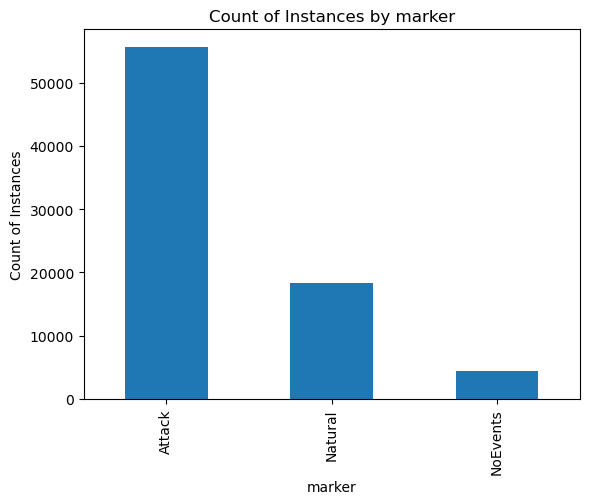

In [16]:
# Visualizing for the Analysis of marker column
merged_data['marker'].value_counts().plot(kind='bar');

# plot label
plt.xlabel("marker")
plt.ylabel("Count of Instances")
plt.title("Count of Instances by marker")

plt.show()

In the power dataset, the attack instances are the most recored followed by natural instances and No events instances were the least.

### Outliers detection

[Text(0.5, 1.0, 'Box Plot of Scores')]

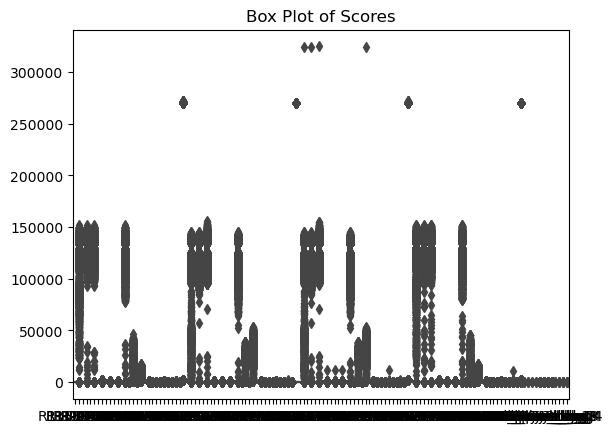

In [17]:
sns.boxplot(data=merged_data).set(title="Box Plot of Scores")


In [18]:
def remove_outlier(merged_data):
    '''
    function removes the outliers from the dataset
    '''
    for col in merged_data.columns:
        percentiles = merged_data[col].quantile([0.01,0.99]).values
        #replacing the oultiers with nan values
        merged_data[col][merged_data[col] < percentiles[0]] = np.nan
        merged_data[col][merged_data[col] > percentiles[1]] = np.nan
      
    return merged_data

power_data=remove_outlier(merged_data.iloc[:,:-1])

In [19]:
power_data["marker"] =  merged_data["marker"]
power_data

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4,marker
0,70.399324,127673.0908,-49.572308,127648.0176,-169.578319,127723.2374,65.689611,605.91099,-57.003571,626.78553,...,0.0,0,0,0,0,0.0,0.0,0.0,0.0,NoEvents
1,73.688102,130280.7109,-46.300719,130255.6377,-166.278082,130355.9307,71.831719,483.59351,-50.947407,500.98896,...,0.0,0,0,0,0,0.0,0.0,0.0,0.0,NoEvents
2,73.733939,130305.7842,-46.254883,130280.7109,-166.232245,130381.0040,71.808800,483.59351,-50.913030,500.98896,...,0.0,0,0,0,0,0.0,0.0,0.0,0.0,NoEvents
3,74.083443,130581.5902,-45.899649,130556.5169,-165.882741,130656.8100,72.152575,482.86107,-50.437475,499.15786,...,0.0,0,0,0,0,0.0,0.0,0.0,0.0,NoEvents
4,74.553268,131083.0556,-45.424094,131057.9823,-165.424375,131158.2754,72.118198,484.50906,-50.013486,497.69298,...,0.0,0,0,0,0,0.0,0.0,0.0,0.0,NoEvents
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,141.589330,131885.4002,21.606238,131860.3269,-98.382583,131960.6200,143.348311,309.45590,22.156278,315.13231,...,0.0,0,0,0,0,0.0,0.0,0.0,0.0,Natural
78373,141.526305,131960.6200,21.566131,131910.4735,-98.439879,132010.7666,143.010266,310.37145,21.915636,315.49853,...,0.0,0,0,0,0,0.0,0.0,0.0,0.0,Natural
78374,141.365877,132035.8398,21.394244,131985.6933,-98.611766,132085.9864,141.950294,313.30121,21.245275,317.14652,...,0.0,0,0,0,0,0.0,0.0,0.0,0.0,Natural
78375,141.348688,132035.8398,21.371326,131985.6933,-98.617496,132111.0596,141.829973,313.11810,21.193709,317.51274,...,0.0,0,0,0,0,0.0,0.0,0.0,0.0,Natural


In [20]:
power_data.isnull().sum()

R1-PA1:VH     1568
R1-PM1:V      1568
R1-PA2:VH     1567
R1-PM2:V      1562
R1-PA3:VH     1568
              ... 
snort_log1       4
snort_log2       4
snort_log3       7
snort_log4       6
marker           0
Length: 129, dtype: int64

In [21]:
# Dropping the outliers
power_data = power_data.dropna()

In [22]:
# checking to confirm that the nan values are dropped
power_data.isnull().values.any()

False

In [23]:
power_data.shape

(50674, 129)

After dropping the oultiers the dataset now has 5,0674 rows and 129 columns

In [24]:
# checking for infinity values
np.isinf(power_data.iloc[:,:-1]).values.sum()

2392

In [25]:
# dropping infinite values
power_data = power_data.replace([np.inf, -np.inf], np.nan).dropna(axis=0)

In [26]:
# checking for infinity values
np.isinf(power_data.iloc[:,:-1]).values.sum()

0

In [27]:
power_data.shape

(49323, 129)

After cleaning the dataset by removing outliers, duplicates and infinity values.
The final dataset we will work with has <b>49323</b> rows and <b>129</b> columns.

# Preprocessing

## label encoding for 'marker' attribute


In [28]:
markerEncodedLabels=LabelEncoder() 
marker=markerEncodedLabels.fit_transform(power_data['marker'])
marker[:]
power_data['marker']=marker

In [29]:
power_data['marker'].sample(25)

30736    1
58237    0
18050    0
68887    0
3152     0
59036    0
71638    0
45846    1
59273    0
9536     1
51508    1
51464    1
27019    0
8323     1
42939    0
18854    0
54440    0
32796    0
73937    0
77849    1
42284    0
5482     0
39277    0
2325     0
27622    0
Name: marker, dtype: int32

## Retrieving independent variables and dependent variables.

In [30]:
X = power_data.iloc[:,:-1] #independent variables
y = power_data.iloc[:,-1:] #dependent variables

## Perform standard data scaling 


In [31]:
scaler=StandardScaler() #scales data to unit variance
X=pd.DataFrame(scaler.fit_transform(X), columns=X.columns, index=X.index) #computes mean and stdev and then uses this to transorm data
X

,R1-PA1:VH,R1-PM1:V,R1-PA2:VH,R1-PM2:V,R1-PA3:VH,R1-PM3:V,R1-PA4:IH,R1-PM4:I,R1-PA5:IH,R1-PM5:I,...,control_panel_log3,control_panel_log4,relay1_log,relay2_log,relay3_log,relay4_log,snort_log1,snort_log2,snort_log3,snort_log4
1,0.913098,-1.624917,-0.523941,-1.267807,-1.825424,-1.611175,0.902695,1.290041,-0.549700,1.463916,...,0.0,0.0,-0.012737,-0.01424,-0.012737,-0.01424,0.0,0.0,0.0,0.0
2,0.913554,-1.596651,-0.523527,-1.240071,-1.824942,-1.582903,0.902466,1.290041,-0.549389,1.463916,...,0.0,0.0,-0.012737,-0.01424,-0.012737,-0.01424,0.0,0.0,0.0,0.0
3,0.917033,-1.285724,-0.520312,-0.934976,-1.821269,-1.271902,0.905892,1.280921,-0.545086,1.440858,...,0.0,0.0,-0.012737,-0.01424,-0.012737,-0.01424,0.0,0.0,0.0,0.0
4,0.921709,-0.720404,-0.516008,-0.380256,-1.816452,-0.706447,0.905549,1.301441,-0.541250,1.422413,...,0.0,0.0,-0.012737,-0.01424,-0.012737,-0.01424,0.0,0.0,0.0,0.0
5,0.921652,-0.748670,-0.516163,-0.407992,-1.816633,-0.734720,0.902181,1.326521,-0.542753,1.427024,...,0.0,0.0,-0.012737,-0.01424,-0.012737,-0.01424,0.0,0.0,0.0,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,1.588901,0.184108,0.090648,0.507295,-1.111860,0.198282,1.615292,-0.878258,0.111707,-0.876380,...,0.0,0.0,-0.012737,-0.01424,-0.012737,-0.01424,0.0,0.0,0.0,0.0
78373,1.588273,0.268906,0.090285,0.562767,-1.112462,0.254828,1.611924,-0.866858,0.109530,-0.871769,...,0.0,0.0,-0.012737,-0.01424,-0.012737,-0.01424,0.0,0.0,0.0,0.0
78374,1.586677,0.353704,0.088729,0.645975,-1.114269,0.339646,1.601362,-0.830377,0.103465,-0.851018,...,0.0,0.0,-0.012737,-0.01424,-0.012737,-0.01424,0.0,0.0,0.0,0.0
78375,1.586506,0.353704,0.088522,0.645975,-1.114329,0.367919,1.600163,-0.832657,0.102998,-0.846406,...,0.0,0.0,-0.012737,-0.01424,-0.012737,-0.01424,0.0,0.0,0.0,0.0


# Model creation and Evaluation

The following performance Metrics were chosen; F1 score, recall and precision. This is because they are the appropriate for evaluating performance for classification models.  
Recall provides the proportion of actual positive cases which are correctly identified.  
Precision provides the proportion of positive cases that were correctly identified.  
F1 score provides the harmonic mean of precision and recall. It was used because the marker classes are imbalanced 


## Cross Validation: k-Fold Cross Validation

In [32]:
k=10 #set the number of splits (k)

In [33]:
#create cross validation object
kfolds=StratifiedKFold(n_splits=k,shuffle=False) #for 10-fold cross validation

## Random Forest model

In [34]:
# Create the random forest model
rfc_model = RandomForestClassifier(random_state=42)

In [35]:
# Model performance
rfc_precision  = cross_val_score(rfc_model, X, y, cv=k, scoring='precision_weighted')
rfc_recall  = cross_val_score(rfc_model, X, y, cv=k, scoring='recall_weighted')
rfc_f1score  = cross_val_score(rfc_model, X, y, cv=k, scoring='f1_weighted')


In [36]:
print("Random Forest model performance scores")
print(f"Precision:{rfc_precision.mean():.3f}\nRecall:{rfc_recall.mean():.3f}\
       \nF1_score:{rfc_f1score.mean():.3f}")

Random Forest model performance scores
Precision:0.657
Recall:0.703       
F1_score:0.671


## logistic regression

In [37]:
# Build the logistic model
log_model = LogisticRegression()

In [38]:
# use 10-fold cross-validation to evaluate the model

log_precision  = cross_val_score(log_model, X, y, cv=k, scoring='precision_weighted')
log_recall  = cross_val_score(log_model, X, y, cv=k, scoring='recall_weighted')
log_f1score  = cross_val_score(log_model, X, y, cv=k, scoring='f1_weighted')

print("Logistic regression model performance scores")

print(f"Precision:{log_precision.mean():.3f}\nRecall:{log_recall.mean():.3f}\
\nF1-Score:{log_f1score.mean():.3f}")



Logistic regression model performance scores
Precision:0.655
Recall:0.732
F1-Score:0.641


## k-Nearest neighbor

In [39]:
# create a KNN classifier with k=5
knn_model = KNeighborsClassifier(n_neighbors=5)


In [40]:
# use 10-fold cross-validation to evaluate the model

knn_precision  = cross_val_score(knn_model, X, y, cv=k, scoring='precision_weighted')
knn_recall  = cross_val_score(knn_model, X, y, cv=k, scoring='recall_weighted')
knn_f1score  = cross_val_score(knn_model, X, y, cv=k, scoring='f1_weighted')

print("KNN model performance scores")
print(f"Precision:{knn_precision.mean():.3f}\nRecall:{knn_recall.mean():.3f}\
\nF1-score:{knn_f1score.mean():.3f}")



KNN model performance scores
Precision:0.635
Recall:0.644
F1-score:0.639


In [ ]:
## Visualizing the model evaluation using the F1 Score metric

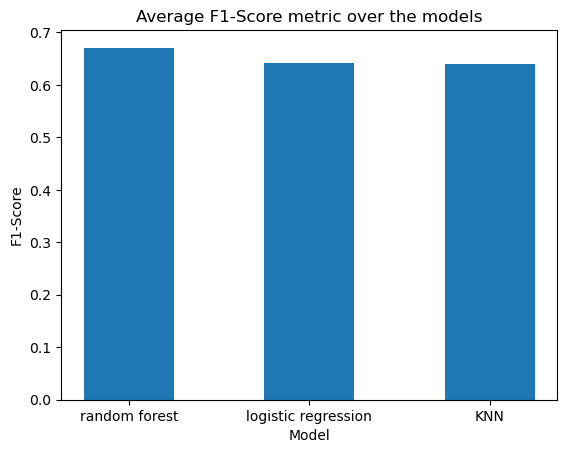

<Figure size 640x480 with 0 Axes>

In [41]:
#Retrieve f1-score
knnF1score = knn_f1score.mean()
rfF1score = rfc_f1score.mean()
logF1score = log_f1score.mean()

f1_scores={"random forest":rfF1score, "logistic regression":logF1score, "KNN":knnF1score}

# Plot the graph of f1score
models=list(f1_scores.keys())
modelF1scores=list(f1_scores.values())
plt.bar(models, modelF1scores, width = 0.5)
#Set up other properties e.g. label and title
plt.xlabel("Model", color='black')
plt.ylabel("F1-Score", color='black')
plt.title("Average F1-Score metric over the models")
plt.show()
plt.tight_layout()

# Feature Selection and Engineering

Used the forward stepwise regression approach to select features that significantly contribute to model performance with 95% confidence as another technique of dimensionality reduction. one feature at a time is added as the threshold is monitored, alpha=0.95, until addition of a feature goes beyond the set mark at which point addition stops.

In [42]:
#forward regression method from https://github.com/AakkashVijayakumar/stepwise-regression/blob/master/stepwise_regression/step_reg.py

#list to hold selected features
selectedFeatures =[]
def forward_regression(X, y,
                       threshold_in,
                       verbose=False):
    initial_list = []
    bic={}
    included = list(initial_list)
    while True:
        changed=False
        excluded = list(set(X.columns)-set(included))
        new_pval = pd.Series(index=excluded)
        for new_column in excluded:
            model = sm.OLS(y, sm.add_constant(pd.DataFrame(X[included+[new_column]]))).fit()
            bic[model.bic]=included+[new_column]
            new_pval[new_column] = model.pvalues[new_column]
        best_pval = new_pval.min()
        if best_pval < threshold_in:
            best_feature = new_pval.idxmin()
            included.append(best_feature)
            changed=True
            if verbose:
                print('Add  {:30} with p-value {:.6}'.format(best_feature, best_pval))
                selectedFeatures.append(best_feature)#storing the added feature

        if not changed:
            break
    print(model.summary())
    return included
    
b=forward_regression(X,y,0.05,verbose=True)#function call to forward regression

Add  R4-PM2:V                       with p-value 4.45972e-233
Add  R2-PM1:V                       with p-value 0.0
Add  R4-PA:ZH                       with p-value 5.11352e-262
Add  R3-PM2:V                       with p-value 1.79682e-268
Add  R3-PM5:I                       with p-value 4.12153e-162
Add  R3-PA:Z                        with p-value 7.1175e-20
Add  R1-PM12:I                      with p-value 1.40064e-16
Add  R2-PA:ZH                       with p-value 1.96021e-30
Add  R2-PA6:IH                      with p-value 1.66362e-13
Add  R3-PA5:IH                      with p-value 2.27138e-20
Add  R3-PA10:IH                     with p-value 7.2769e-29
Add  R1-PM11:I                      with p-value 3.6193e-05
Add  R4-PM4:I                       with p-value 0.000153516
Add  R4-PM10:I                      with p-value 1.85406e-23
Add  R1-PA:ZH                       with p-value 1.03917e-16
Add  R1-PA:Z                        with p-value 1.18563e-23
Add  R2-PM11:I                 

In [43]:
#selected features
print(selectedFeatures)

['R4-PM2:V', 'R2-PM1:V', 'R4-PA:ZH', 'R3-PM2:V', 'R3-PM5:I', 'R3-PA:Z', 'R1-PM12:I', 'R2-PA:ZH', 'R2-PA6:IH', 'R3-PA5:IH', 'R3-PA10:IH', 'R1-PM11:I', 'R4-PM4:I', 'R4-PM10:I', 'R1-PA:ZH', 'R1-PA:Z', 'R2-PM11:I', 'R2-PM12:I', 'R2-PA5:IH', 'R4-PM6:I', 'R3-PA11:IH', 'R3-PA:ZH', 'R2-PA10:IH', 'R2-PA4:IH', 'R4-PM12:I', 'R4-PM11:I', 'R4-PM5:I', 'R1-PM2:V', 'R1-PM6:I', 'R1-PM4:I', 'R4-PM1:V', 'R2-PM4:I', 'R2-PA:Z', 'R1-PM5:I', 'R4:F', 'R2:DF', 'R2-PM2:V', 'R4-PA12:IH']


In [44]:
len(selectedFeatures)

38

40 out of 128 features have been selected and will be used to fit the models.

In [45]:
X_new = X[selectedFeatures]
X_new

,R4-PM2:V,R2-PM1:V,R4-PA:ZH,R3-PM2:V,R3-PM5:I,R3-PA:Z,R1-PM12:I,R2-PA:ZH,R2-PA6:IH,R3-PA5:IH,...,R1-PM6:I,R1-PM4:I,R4-PM1:V,R2-PM4:I,R2-PA:Z,R1-PM5:I,R4:F,R2:DF,R2-PM2:V,R4-PA12:IH
1,-2.078248,-1.483978,0.296518,-1.629011,1.452769,-0.953945,1.461310,-0.363141,0.093021,1.372907,...,1.270298,1.290041,-1.871753,1.289737,-0.646327,1.463916,1.328920,-0.127843,-1.564358,-1.584909
2,-2.052164,-1.478711,0.288353,-1.629011,1.452769,-0.960300,1.461310,-0.362967,0.092973,1.373508,...,1.265746,1.290041,-1.843992,1.284005,-0.644538,1.463916,1.328920,-0.127843,-1.549546,-1.592998
3,-1.791319,-1.234990,0.287336,-1.384775,1.436634,-0.969337,1.290026,-0.357545,0.095018,1.378072,...,1.270298,1.280921,-1.538616,1.296106,-0.655551,1.440858,0.921524,-0.127843,-1.306422,-1.613129
4,-1.243546,-0.813375,0.392668,-0.937009,1.415890,-0.995210,0.947456,-0.350763,0.092534,1.382216,...,1.311269,1.301441,-0.983386,1.313796,-0.680664,1.422413,0.514127,-0.127843,-0.872612,-1.683048
5,-1.295715,-0.829810,0.537857,-0.977715,1.418195,-1.023138,0.810429,-0.346893,0.090002,1.381855,...,1.334031,1.326521,-1.038909,1.342385,-0.699007,1.427024,0.310429,-0.127843,-0.897331,-1.640090
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
78372,-0.226253,0.818941,-0.660471,0.670878,-0.810690,0.661401,-0.662619,-0.332258,0.679637,-1.695127,...,-0.851094,-0.878258,0.127073,-0.888504,0.458458,-0.876380,0.310429,-0.127843,0.761344,-0.908816
78373,-0.226253,0.842463,-0.611401,0.691231,-0.819910,0.622514,-0.662619,-0.328267,0.676374,-1.694587,...,-0.837437,-0.866858,0.099311,-0.872228,0.436668,-0.871769,0.106731,-0.127843,0.780112,-0.881585
78374,-0.252337,0.872944,-0.395998,0.711584,-0.842959,0.601516,-0.662619,-0.313109,0.671650,-1.694226,...,-0.812400,-0.830377,0.099311,-0.826373,0.396048,-0.851018,0.310429,-0.127843,0.806150,-0.087672
78375,-0.226253,0.871719,-0.403149,0.711584,-0.836045,0.594805,-0.662619,-0.311470,0.671212,-1.694166,...,-0.810123,-0.832657,0.099311,-0.828213,0.397802,-0.846406,0.310429,-0.127843,0.814177,-0.087672


## Evaluationg the models with the selected features

## Random Forest model

In [46]:
rfc_precision  = cross_val_score(rfc_model, X_new, y, cv=k, scoring='precision_weighted')
rfc_recall  = cross_val_score(rfc_model, X_new, y, cv=k, scoring='recall_weighted')
rfc_f1score = cross_val_score(rfc_model, X_new, y, cv=k, scoring='f1_weighted')

print("Random Forest model performance scores")
print(f"Precision:{rfc_precision.mean():.3f}\nRecall:{rfc_recall.mean():.3f}\
       \nF1-score:{rfc_f1score.mean():.3f}")


Random Forest model performance scores
Precision:0.667
Recall:0.715       
F1-score:0.681


## logistic regression

In [47]:
# use 10-fold cross-validation to evaluate the model

log_precision  = cross_val_score(log_model, X_new, y, cv=k, scoring='precision_weighted')
log_recall  = cross_val_score(log_model, X_new, y, cv=k, scoring='recall_weighted')
log_f1score  = cross_val_score(log_model, X_new, y, cv=k, scoring='f1_weighted')

print("Logistic regression model performance scores")

print(f"Precision:{log_precision.mean():.3f}\nRecall:{log_recall.mean():.3f}\
\nF1-score:{log_f1score.mean():.3f}")



Logistic regression model performance scores
Precision:0.639
Recall:0.728
F1-score:0.635


## k-Nearest neighbor

In [48]:
# use 10-fold cross-validation to evaluate the model

knn_precision  = cross_val_score(knn_model, X_new, y, cv=k, scoring='precision_weighted')
knn_recall  = cross_val_score(knn_model, X_new, y, cv=k, scoring='recall_weighted')
knn_f1score  = cross_val_score(knn_model, X_new, y, cv=k, scoring='f1_weighted')

print("KNN model performance scores")
print(f"Precision:{knn_precision.mean():.3f}\nRecall:{knn_recall.mean():.3f}\
\nF1-score:{knn_f1score.mean():.3f}")


KNN model performance scores
Precision:0.640
Recall:0.652
F1-score:0.645


## Visualizing the model evaluation using the F1 Score metric

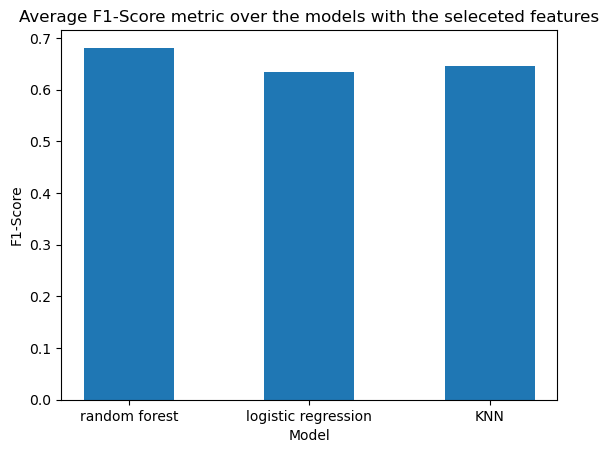

<Figure size 640x480 with 0 Axes>

In [49]:
#Retrieve f1-score
knnF1score = knn_f1score.mean()
rfF1score = rfc_f1score.mean()
logF1score = log_f1score.mean()

f1_scores={"random forest":rfF1score, "logistic regression":logF1score, "KNN":knnF1score}

# Plot the graph of f1score
models=list(f1_scores.keys())
modelF1scores=list(f1_scores.values())
plt.bar(models, modelF1scores, width = 0.5)
#Set up other properties e.g. label and title
plt.xlabel("Model", color='black')
plt.ylabel("F1-Score", color='black')
plt.title("Average F1-Score metric over the models with the seleceted features")
plt.show()
plt.tight_layout()

## Performance metric evaluations


In [53]:
knnPrecision = knn_precision.mean()
rfPrecision = rfc_precision.mean()
logPrecision = log_precision.mean()


knnRecall = knn_recall.mean()
rfRecall = rfc_recall.mean()
logRecall = log_recall.mean()

metrics = {
    "Model" : ["random forest", "logistic regression", "KNN"],
    "F1_score" : [rfF1score, logF1score, knnF1score],
    "Precision" : [rfPrecision, logPrecision, knnPrecision],
    "Recall" : [rfRecall, logRecall, knnRecall]
}

metrics_df = pd.DataFrame(metrics, columns = ["Model", "F1_score","Precision", "Recall"])

metrics_df

,Model,F1_score,Precision,Recall
0,random forest,0.681396,0.667369,0.714879
1,logistic regression,0.634598,0.639299,0.728139
2,KNN,0.645319,0.640206,0.652495


# Hyper parameter tuning

In [55]:
# Create a random forest classifier
rf = RandomForestClassifier()

# Set up the hyperparameter tuning
parameters = {'n_estimators': [10, 50, 100, 200],
              'max_depth': [10, 20, 30]}

# Perform the grid search
grid_search = GridSearchCV(estimator=rf, param_grid=parameters, cv=k, scoring='accuracy')
grid_search.fit(X_new, y)

# Evaluating the model results
print('Best hyperparameters are: '+str(grid_search.best_params_))
print('Best score is: '+str(grid_search.best_score_))

Best hyperparameters are: {'max_depth': 10, 'n_estimators': 100}
Best score is: 0.7404051146679372


After hyper parameter tuning the accuracy score of the random forest model 0.7404. Overall, the tuned model performed better than benchmark model selected.

## Visualizing the model evaluation using Accuracy

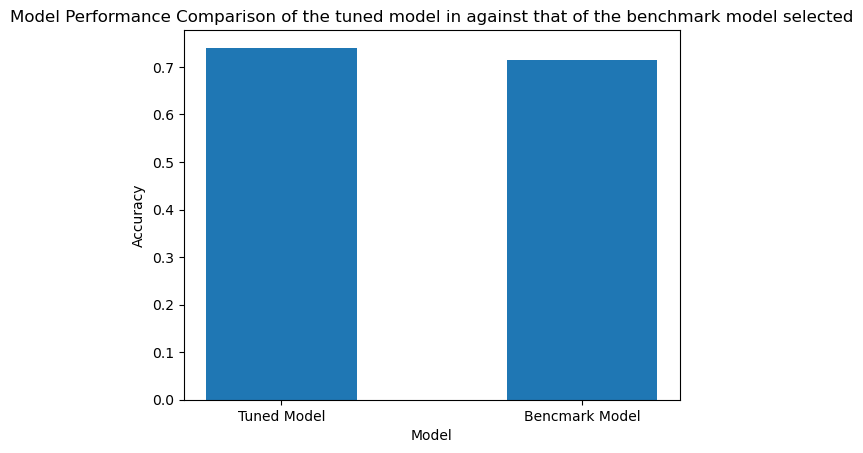

<Figure size 640x480 with 0 Axes>

In [57]:
rfc_score = cross_val_score(rfc_model, X_new, y, cv=k, scoring='accuracy')
benchmarkModel_score = rfc_score.mean()

tunedModel_score = grid_search.best_score_

model_scores={"Tuned Model":tunedModel_score, "Bencmark Model":benchmarkModel_score}

# Plot the graph of f1score
models=list(model_scores.keys())
modelScores=list(model_scores.values())
plt.bar(models, modelScores, width = 0.5)
#Set up other properties e.g. label and title
plt.xlabel("Model")
plt.ylabel("Accuracy")
plt.title("Model Performance Comparison of the tuned model in against that of the benchmark model selected")
plt.show()
plt.tight_layout()

In [58]:
benchmarkModel_score

0.7148794741671406